<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-типа-данных" data-toc-modified-id="Изменение-типа-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение типа данных</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование и анализ данных о тарифах пользователей

В настоящем проекте нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. У нас собраны данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файлов

### Таблица users (информация о пользователях): 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display
from scipy import stats as st

users = pd.read_csv('/datasets/users.csv') #, sep = '\t')

display(users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Таблица users (информация о пользователях):
user_id — уникальный идентификатор пользователя
first_name — имя пользователя
last_name — фамилия пользователя
age — возраст пользователя (годы)
reg_date — дата подключения тарифа (день, месяц, год)
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
city — город проживания пользователя
tarif — название тарифного плана

In [2]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [3]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [4]:
users.duplicated().value_counts()

False    500
dtype: int64

Таблица users содержит пропуски в столбце churn_date. Эти пропуски объяснимы, поскольку незаполненное значение обозначает, что тариф действовал на момент создания файла.
Явных дубликатов нет. Так как каждому пользователю присвоен свой id и они не повторяются, вероятность того, что поль

Данные в столбце 'reg_date' - non-null object являются датами, необходимо изменить тип данных.

В столбцах first_name и 'last_name' данные представлены строками в разных регистрах.

Наименования столбцов имеют приемлемый вид: нет сочетания строчных и прописных букв, "змеиный" стиль, соотносятся с информацией в столбцах по смыслу.

### Таблица calls (информация о звонках):

In [5]:
calls = pd.read_csv('/datasets/calls.csv')
display(calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Таблица calls (информация о звонках):
id — уникальный номер звонка
call_date — дата звонка
duration — длительность звонка в минутах
user_id — идентификатор пользователя, сделавшего звонок

In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Таблица calls не содержит пропусков в столбцах.

Данные в столбце call_date - non-null object являются датами, необходимо изменить тип данных.

Наименования столбцов имеют приемлемый вид: нет сочетания строчных и прописных букв, "змеиный" стиль, соотносятся с информацией в столбцах по смыслу.

### Таблица internet (информация об интернет-сессиях)

In [8]:
internet = pd.read_csv('/datasets/internet.csv')
display(internet.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Таблица internet (информация об интернет-сессиях):
id — уникальный номер сессии
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
session_date — дата интернет-сессии
user_id — идентификатор пользователя


In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [10]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Таблица internet не содержит пропусков в столбцах.

Данные в столбце session_date - non-null object являются датами, необходимо изменить тип данных.

Наименования столбцов имеют приемлемый вид: нет сочетания строчных и прописных букв, "змеиный" стиль, соотносятся с информацией в столбцах по смыслу.
Исключение - столбец 'Unnamed: 0'. Он отсутствует в описании и, по сути, повторяет столбец с нумерацией строк.

### Таблица messages (информация о сообщениях)

In [11]:
messages = pd.read_csv('/datasets/messages.csv')
display(messages.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Таблица messages (информация о сообщениях):
id — уникальный номер сообщения
message_date — дата сообщения
user_id — идентификатор пользователя, отправившего сообщение


In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Таблица messages не содержит пропусков в столбцах.

Данные в столбце message_date - non-null object являются датами, необходимо изменить тип данных.

Наименования столбцов имеют приемлемый вид: нет сочетания строчных и прописных букв, "змеиный" стиль, соотносятся с информацией в столбцах по смыслу. 

### Таблица tariffs (информация о тарифах)

In [14]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
display(tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица tariffs (информация о тарифах):
tariff_name — название тарифа
rub_monthly_fee — ежемесячная абонентская плата в рублях
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
messages_included — количество сообщений в месяц, включённых в абонентскую плату
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
rub_per_message — стоимость отправки сообщения сверх тарифного пакета
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Вывод

**Вывод** 
В таблицах нет дубликатов (явных) и пропусков. Пропуски в таблице users, столбец churn_date объяснимы, поскольку незаполненное значение обозначает, что тариф действовал на момент создания файла. Для всех таблиц необходимо перевести формат столбцов, содержащих дату в формат даты.

## Предобработка данных

### Изменение типа данных

В столбцaх дат - нераспознанные даты. Применим метод to_datetime. В дальнейшем нам понадобятся только день, месяц и год.


In [15]:
#bad_date = [ users['reg_date'], calls['call_date'],  internet['session_date'], messages['message_date']]
#for column in bad_date:
#    column = pd.to_datetime(column, format='%Y-%m-%d')
#    print(column, column.dtype)
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')



In [16]:
#КОД РЕВЬЮЕРА
calls.info()
print('---------------------')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


Проверим, все ли пользователи подключились в текущем году:

In [17]:
pd.DatetimeIndex(users['reg_date']).year.value_counts()

2018    500
Name: reg_date, dtype: int64

Да, год только 2018, меняем на месяцы

In [18]:
users['reg_date'] = pd.DatetimeIndex(users['reg_date']).month
users['reg_date'].value_counts()

4     53
8     50
10    45
7     44
1     43
11    42
5     41
6     40
2     39
12    36
9     35
3     32
Name: reg_date, dtype: int64

То же самое проделаем со столбцами дат в других файлах, проверяем год, если год только 2018 - меняем на месяцы:

In [19]:
pd.DatetimeIndex(calls['call_date']).year.value_counts()

2018    202607
Name: call_date, dtype: int64

In [20]:
calls['call_date'] = pd.DatetimeIndex(calls['call_date']).month
calls['call_date'].value_counts()

12    33987
11    29501
10    27146
9     24061
8     21488
7     18298
6     14716
5     12647
4      9272
3      6687
2      3328
1      1476
Name: call_date, dtype: int64

In [21]:
pd.DatetimeIndex(internet['session_date']).year.value_counts()

2018    149396
Name: session_date, dtype: int64

In [22]:
internet['session_date'] = pd.DatetimeIndex(internet['session_date']).month
internet['session_date'].value_counts()

12    24799
11    21817
10    20009
9     17512
8     16092
7     13548
6     11057
5      9408
4      6511
3      4885
2      2641
1      1117
Name: session_date, dtype: int64

In [23]:
pd.DatetimeIndex(messages['message_date']).year.value_counts()

2018    123036
Name: message_date, dtype: int64

In [24]:
messages['message_date'] = pd.DatetimeIndex(messages['message_date']).month
messages['message_date'].value_counts()

12    20555
11    18244
10    17114
9     14759
8     13088
7     11320
6      8983
5      7298
4      5179
3      3648
2      1924
1       924
Name: message_date, dtype: int64

### Обработка пропусков

У нас есть пропуски дат в таблице users, столбец churn_date. Была идея оставить булевы значения (закрыт тариф или нет). Но ведь для расчета суммы выручки нам понадобится знать, сколько месяцев действовал тариф. Добавим столбец month_end c последним месяцем года по незакрытым тарифам и месяцем из даты churn_date - по закрытым (для определения расчетного периода в 2018 году)

In [25]:
#users[users['churn_date'].isna() == True] = '2018-12-31'
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['churn_date'] = pd.DatetimeIndex(users['churn_date']).month
users.loc[(users['churn_date'].isna() == True), 'churn_date'] = 12
users['churn_date'].value_counts().sum()

500

In [26]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,12.0,Краснодар,Рафаил,Верещагин,5,ultra
1,1001,41,12.0,Москва,Иван,Ежов,11,smart
2,1002,59,12.0,Стерлитамак,Евгений,Абрамович,6,smart
3,1003,23,12.0,Москва,Белла,Белякова,8,ultra
4,1004,68,12.0,Новокузнецк,Татьяна,Авдеенко,5,ultra


Что-то у нас churn_date не того типа данных. Исправим методом astype, так как у нас уже числа в столбце:

In [27]:
users['churn_date'] = users['churn_date'].astype('int')

In [28]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null int64
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null int64
tariff        500 non-null object
dtypes: int64(4), object(4)
memory usage: 31.4+ KB


In [29]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null int64
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.2+ MB


## Расчёты и добавление результатов в таблицу

### Проверка значений

Для дальнейшей работы необходимо создать сводную таблицу данных по тарифам. До сведения проверим столбцы со сводимыми данными, на предмет экстраординарных значений, поскольку они "утонут" после группировки.

In [30]:
calls['duration'].describe()


count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

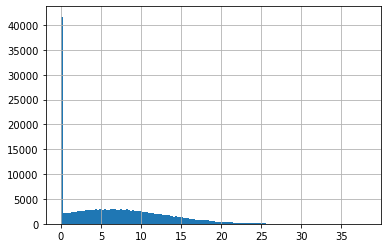

In [31]:
calls['duration'].hist(bins = 150)

Длительность звонка от 0 до 38 минут, большая часть звонко - до 6 минут ничего выдающегося. Нулевой пик пояснен разработчиком - это входящие звонки.

In [32]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

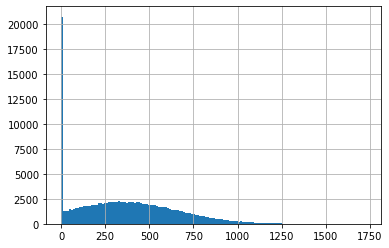

In [33]:
internet['mb_used'].hist(bins = 150)

тоже ничего выдающегося по большим потребителям - они составляют "хвост" с низкой частотой. Мы построили гистограмму распределения значений, на которой видно, что есть пик околонулевых значений. 

In [34]:
internet.sort_values(by = 'mb_used')

,Unnamed: 0,id,mb_used,session_date,user_id
116616,116616,1393_102,0.00,6,1393
53410,53410,1179_272,0.00,8,1179
104303,104303,1353_239,0.00,10,1353
19438,19438,1065_583,0.00,3,1065
19437,19437,1065_582,0.00,7,1065
...,...,...,...,...,...
140299,140299,1471_182,1623.92,7,1471
103480,103480,1348_138,1651.25,10,1348
7063,7063,1024_118,1651.55,11,1024
119156,119156,1402_191,1702.75,10,1402


In [35]:
internet[internet['mb_used'] == 0]['mb_used'].count()

19598

In [36]:
internet.query(' 0 < mb_used < 1')['mb_used'].count()

101

Проверка значений около нуля показала, что есть очень высокое количество нулевых значений. Количество соединений до 1 мб имеет нормальный размер. Составитель данных ничего не сказал по поводу этих значений (в отличие от звонков, где нулевыми значениями являются пропущенные звонки). Возможно, здесь нулевые значения - это попытки установки соединения, не увенчавшиеся успехом. Сделать пометку в отчете, не нужна ли тарификация. Удалять эти значения нет необходимости, при объединении данных они исчезнут.

### Консолидация данных

Округлим время звонка вверх перед консолидацией

In [37]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null int64
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.2+ MB


In [38]:
#calls['round'] = (calls['duration'] % calls['duration'].astype('int')) > 0
calls['duration'] = np.ceil(calls['duration']).astype('int')

In [39]:
calls['duration'].value_counts()

0     39613
7     11510
6     11457
5     11411
8     11272
9     10973
4     10918
3     10362
10    10186
11     9385
2      9194
12     8448
1      8402
13     7486
14     6554
15     5505
16     4551
17     3671
18     2984
19     2411
20     1806
21     1304
22      975
23      720
24      468
25      363
26      257
27      151
28      104
29       56
30       39
31       30
32       17
33       10
35        5
34        3
36        2
37        2
38        2
Name: duration, dtype: int64

In [40]:
calls = calls.groupby(['user_id', 'call_date']).sum().reset_index()
calls.head(20)

,user_id,call_date,duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466
5,1000,10,350
6,1000,11,338
7,1000,12,333
8,1001,11,430
9,1001,12,414


In [41]:
calls.columns = ['user_id', 'month', 'duration'] #Переименовали столбцы для слияния
calls = calls[['user_id', 'month', 'duration']] # убрали лишний столбец

In [42]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 3 columns):
user_id     3174 non-null int64
month       3174 non-null int64
duration    3174 non-null int64
dtypes: int64(3)
memory usage: 74.5 KB


Выполним группировку для сообщений. 

In [43]:
messages = messages.groupby(['user_id', 'message_date']).count().reset_index()
messages.head()

,user_id,message_date,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [44]:
messages.columns = ['user_id', 'month', 'messages'] #Переименовали столбцы для слияния


In [45]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
user_id     2717 non-null int64
month       2717 non-null int64
messages    2717 non-null int64
dtypes: int64(3)
memory usage: 63.8 KB


Выполним группировку для интернета. Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. 

In [46]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null int64
user_id         149396 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.7+ MB


In [47]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [48]:
internet = internet.groupby(['user_id', 'session_date']).sum().reset_index()
internet.head()

,user_id,session_date,Unnamed: 0,mb_used
0,1000,5,443,2253.49
1,1000,6,5536,23233.77
2,1000,7,3504,14003.64
3,1000,8,2977,14055.93
4,1000,9,2746,14568.91


In [49]:
internet.columns = ['user_id', 'month', 'Unnamed: 0', 'mb_used'] #Переименовали столбцы для слияния
internet = internet[['user_id', 'month', 'mb_used']] # убрали лишний столбец
internet.head()

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [50]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
user_id    3203 non-null int64
month      3203 non-null int64
mb_used    3203 non-null float64
dtypes: float64(1), int64(2)
memory usage: 75.2 KB


In [51]:
users.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

In [52]:
data = pd.merge(calls, internet, on = ['user_id', 'month'], how='outer')
data.head()

,user_id,month,duration,mb_used
0,1000,5,159.0,2253.49
1,1000,6,172.0,23233.77
2,1000,7,340.0,14003.64
3,1000,8,408.0,14055.93
4,1000,9,466.0,14568.91


Объединений 1 произведено, присоединим таблицу сообщений

In [53]:
data = pd.merge(data, messages, on = ['user_id', 'month'], how='outer')

In [54]:
data.head()

,user_id,month,duration,mb_used,messages
0,1000,5,159.0,2253.49,22.0
1,1000,6,172.0,23233.77,60.0
2,1000,7,340.0,14003.64,75.0
3,1000,8,408.0,14055.93,81.0
4,1000,9,466.0,14568.91,57.0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 5 columns):
user_id     3214 non-null int64
month       3214 non-null int64
duration    3174 non-null float64
mb_used     3203 non-null float64
messages    2717 non-null float64
dtypes: float64(3), int64(2)
memory usage: 150.7 KB


Мы видим пропущенные значения в столбцах duration, mb_used и messages, они связаны с тем, что не во всех месяцев со звонками было использование интернета и смс. Заменим на 0

In [56]:
data.loc[(data['mb_used'].isna() == True), 'mb_used'] = 0
data.loc[(data['messages'].isna() == True), 'messages'] = 0
data.loc[(data['duration'].isna() == True), 'duration'] = 0

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 5 columns):
user_id     3214 non-null int64
month       3214 non-null int64
duration    3214 non-null float64
mb_used     3214 non-null float64
messages    3214 non-null float64
dtypes: float64(3), int64(2)
memory usage: 150.7 KB


Посчитайте для каждого пользователя объем израсходованного интернет-трафика по месяцам в Гб

In [58]:
print(data['mb_used'].max())
data[data['mb_used']==0]['mb_used'].count()

49745.69000000001


13

In [59]:
#data['gb_used']= data['mb_used'] // 1024 + ((data['mb_used'] % 1024)>0)*1 
data['gb_used']= np.ceil(data['mb_used'] / 1024).astype('int')


Небольшая проверка преобразований, проверим, остались ли ноли - нолями и правильно ли перевелся максимум:

In [60]:
print(data['gb_used'].max())
data[data['gb_used']==0]['gb_used'].count()

49


13

Проверка показала, что максимум перевелся корректно( пересчитано вручную), нулевых значений осталось 13

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id     3214 non-null int64
month       3214 non-null int64
duration    3214 non-null float64
mb_used     3214 non-null float64
messages    3214 non-null float64
gb_used     3214 non-null int64
dtypes: float64(3), int64(3)
memory usage: 175.8 KB


In [62]:
data.columns = ['user_id', 'month', 'duration', 'mb_used', 'messages', 'gb_used'] 
data = data[['user_id', 'month', 'duration', 'messages', 'gb_used']]
data['messages'] = data['messages'].astype('int')
data['gb_used'] = data['gb_used'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 5 columns):
user_id     3214 non-null int64
month       3214 non-null int64
duration    3214 non-null float64
messages    3214 non-null int64
gb_used     3214 non-null int64
dtypes: float64(1), int64(4)
memory usage: 150.7 KB


Присоединим данные о тарифах пользователей

In [63]:
data = pd.merge(data, users, on = 'user_id', how='outer')

In [64]:
data.head()

,user_id,month,duration,messages,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,159.0,22.0,3.0,52,12,Краснодар,Рафаил,Верещагин,5,ultra
1,1000,6.0,172.0,60.0,23.0,52,12,Краснодар,Рафаил,Верещагин,5,ultra
2,1000,7.0,340.0,75.0,14.0,52,12,Краснодар,Рафаил,Верещагин,5,ultra
3,1000,8.0,408.0,81.0,14.0,52,12,Краснодар,Рафаил,Верещагин,5,ultra
4,1000,9.0,466.0,57.0,15.0,52,12,Краснодар,Рафаил,Верещагин,5,ultra


In [65]:
data['tariff'].value_counts()

smart    2230
ultra     986
Name: tariff, dtype: int64

Мы видим, что тариф смарт представлен в выборке гораздо шире, 2223 

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 12 columns):
user_id       3216 non-null int64
month         3214 non-null float64
duration      3214 non-null float64
messages      3214 non-null float64
gb_used       3214 non-null float64
age           3216 non-null int64
churn_date    3216 non-null int64
city          3216 non-null object
first_name    3216 non-null object
last_name     3216 non-null object
reg_date      3216 non-null int64
tariff        3216 non-null object
dtypes: float64(4), int64(4), object(4)
memory usage: 326.6+ KB


У нас появились два дополнительных пользователя, отсутствующие во всех трех основаниях начислений - смс, звонках и интернете. 

In [67]:
data.loc[(data['duration'].isna() == True)]

,user_id,month,duration,messages,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
3214,1128,NaN,NaN,NaN,NaN,51,12,Волжский,Ксения,Агаева,12,ultra
3215,1371,NaN,NaN,NaN,NaN,50,12,Омск,Ириней,Трофимов,12,smart


Это подключившиеся в декабре и не успевшие совершить тарифицируемые действия абоненты, для расчета они бесполезны, удалим.

In [68]:
data = data.dropna().reset_index(drop = True)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 12 columns):
user_id       3214 non-null int64
month         3214 non-null float64
duration      3214 non-null float64
messages      3214 non-null float64
gb_used       3214 non-null float64
age           3214 non-null int64
churn_date    3214 non-null int64
city          3214 non-null object
first_name    3214 non-null object
last_name     3214 non-null object
reg_date      3214 non-null int64
tariff        3214 non-null object
dtypes: float64(4), int64(4), object(4)
memory usage: 301.4+ KB


In [70]:
tariffs.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

In [71]:
tariffs.columns = [['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff']]

In [72]:
data.head()

,user_id,month,duration,messages,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,159.0,22.0,3.0,52,12,Краснодар,Рафаил,Верещагин,5,ultra
1,1000,6.0,172.0,60.0,23.0,52,12,Краснодар,Рафаил,Верещагин,5,ultra
2,1000,7.0,340.0,75.0,14.0,52,12,Краснодар,Рафаил,Верещагин,5,ultra
3,1000,8.0,408.0,81.0,14.0,52,12,Краснодар,Рафаил,Верещагин,5,ultra
4,1000,9.0,466.0,57.0,15.0,52,12,Краснодар,Рафаил,Верещагин,5,ultra


In [73]:
tariffs.reset_index()
tariffs.head()
tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff']
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [74]:
data = data.merge( tariffs, on = 'tariff', how='left')

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 19 columns):
user_id                  3214 non-null int64
month                    3214 non-null float64
duration                 3214 non-null float64
messages                 3214 non-null float64
gb_used                  3214 non-null float64
age                      3214 non-null int64
churn_date               3214 non-null int64
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null int64
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
dtypes: float64(4), int64(

И наша база готова для дальнейших расчетов и анализа

### Расчет платы за месяц

In [76]:
def fee_calculation(row):
    month_fee = (row['rub_monthly_fee'] + 
             max(0, (row['duration']-row['minutes_included'])*row['rub_per_minute']) + 
             max(0, (row['messages']-row['messages_included'])*row['rub_per_message']) + 
             max(0, (row['gb_used']- np.ceil(row['mb_per_month_included']/1024))*row['rub_per_gb'])
             )
    return month_fee

data['month_fee'] = data.apply(fee_calculation, axis=1)
data['month_fee'] = np.ceil(data['month_fee']).astype('int')
print(data['month_fee'].describe())

count    3214.000000
mean     1529.076229
std       798.251091
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: month_fee, dtype: float64


Посчитали - уберем лишние столбцы

In [78]:
data = data[['user_id', 'month', 'duration', 'messages', 'gb_used', 'age',
       'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff',
       'month_fee']]

In [ ]:
data['month_fee'].hist(bins = 60)

У нас есть 2 пика, на 550 и на 1950 руб, оба связаны с наличием абонентов, которым хватает заложенных в тарифе пакетов минут, звонков и интернета.

In [ ]:
data['month_fee'].sum()

Любопытно, а какова бы была общая выручка, если бы у пользователей был другой, противоположный  тариф? Проверим

In [ ]:
def fee_calculation_alt(row):
    if row['tariff'] == 'smart':
        month_fee = (1950 + 
                     max(0, (row['duration']-3000)*1) + 
                     max(0, (row['messages']-1000)*1) + 
                     max(0, (row['gb_used']-30)*150)
                    )
    else:
        month_fee = (550 + 
                     max(0, (row['duration']-500)*3) + 
                     max(0, (row['messages']-50)*3) + 
                     max(0, (row['gb_used']-15)*200)
                    )
        
    return month_fee

data['month_fee_alt'] = data.apply(fee_calculation_alt, axis=1)
data['month_fee_alt'] = data['month_fee_alt'].astype('int')

data['month_fee_alt'].sum()

Задачей нашего анализа является ответ на вопрос "какой тариф приносит больше денег" для коммерческого департамента. Очевидно, что по совокупности потребляемых пакетов услуг (звонки, интернет, смс), по сравнению с текущей ситуацией у тарифов есть возможность роста выручки Мегалайн. Проанализируем тарифы подробнее.

## Анализ данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Тарифы смарт и ультра совместно принесли компании Мегалайн 4906753 руб. выручки за 2018 год. Посмотрим, сколько составила выручка по каждому из тарифов:

In [ ]:
print(f'Выручка за 2018 год по тарифу smart составила {data[data["tariff"]== "smart"]["month_fee"].sum()} рублей')

In [ ]:
print(f'Выручка за 2018 год по тарифу ultra составила {data[data["tariff"]== "ultra"]["month_fee"].sum()} рублей')

Выручка по тарифу смарт больше, но и пользователей существенно больше

In [ ]:
smart = data[data["tariff"]== "smart"]
smart.describe()

In [ ]:
ultra = data[data["tariff"]== "ultra"]
ultra.describe()

Таблицы, построенные методом describe наглядно показывают, что пользователи тарифов потребляют разное количество пакетов услуг:
среднее количество смс по тарифу смарт - 16, ультра - 49,
среднее количество минут звонков тарифу смарт - 415, ультра - 524,
среднее количество Гб по тарифу смарт - 16, ультра - 19.
В тарифе ультра определенно есть запас по пакетам услуг, пользователи, даже на максимуме, не используют всех доступных смс(доступно 1000, испольовано макс 224) и минут (доступно 3000, испольовано макс 1658), но перерасходуют интернет, с этим и связано увеличение ежемесячной платы сверх тарифа. 

С одной стороны, тариф смарт выглядит более дешевым для клиента, медианное значение 1019 - против 1950 у пользвателя ультра.
Медианное значение отличается от среднего в тарифе смарт сильнее, чем в тарифе ультра.


In [ ]:
print(f'В тарифе смарт {smart["user_id"].value_counts().count()} уникальных пользователей генерировали доход компании совокупно {smart["user_id"].count()} месяцев, т.е.  {smart["user_id"].count()/ smart["user_id"].value_counts().count()} месяцев на человека в среднем ')
print(f'В тарифе смарт {ultra["user_id"].value_counts().count()} уникальных пользователей генерировали доход компании совокупно {ultra["user_id"].count()} месяцев, т.е.  {ultra["user_id"].count()/ ultra["user_id"].value_counts().count()} месяцев на человека в среднем')

В несмотря на различия в объемах выборок, в среднем каждый человек был подключен к тарифу более 6 месяцев.

In [ ]:
print(f'Выручка за 2018 год по тарифу ultra для текущих пользователей тарифа smart составила {data[data["tariff"]== "smart"]["month_fee_alt"].sum()} рублей')
print(f'Выручка за 2018 год по тарифу smart для текущих пользователей тарифа ultra составила {data[data["tariff"]== "ultra"]["month_fee_alt"].sum()} рублей')

Когда 

In [ ]:
ax = (smart
    .plot(
        kind='hist',
        y='month_fee',
        
        histtype='step',
        linewidth=3,
        legend=True,
        label='Тариф смарт',
        figsize = (12,12)
    )
)

(
    ultra
    .plot(
        kind='hist',
        y='month_fee',
        ax=ax,
        alpha=0.5,
        legend=True,
        label='Тариф ультра',
        title='Сравнение тарифов смарт и ультра',
    )
);

Мы видим на графике пользователей тарифа смарт, которые уже платят больше, чем по тарифу ультра. Очевидно, что мы не получим больше выручки, если переведем таких пользователей на тариф ультра. А вот все, кто находятся слева от величины 1950 - потенциальные источники большей выручки компании Мегалайн.


In [ ]:
ax = smart.plot(x='month', y='month_fee', kind='scatter', alpha=0.3, figsize = (10, 7), label='Тариф смарт')
ultra.plot(x='month', y='month_fee', kind='scatter', alpha=0.3, ax = ax, c="red", figsize = (10, 7), label='Тариф ультра')

plt.title('Диаграмма разброса ежемесячной платы по тарифам')
plt.show()

На этой диаграмме рассеяния мы так же видим, что хотя разброс по тарифу смарт больше, пороговое знаяение стартового платежа в тарифе ультра - выше, а значит, можно попробовать воздействовать (обзвон, реклама, смс с предложениями) на группу клиентов, чей платеж выже 1500 рублей, но ниже 1950 рублей с целью склонить их к переходу на тариф ультра. Мотивацией может стать то, что клиенты смогут свободнее пользоваться услугами связи (мы видим, что в среднем пользователи тарифа ультра тратят больше минут за месяц, отправляют больше смс и тратят больше Гб интернета. Те, кто приближаются к ним  по расходам могут счесть более выгодным расширение бесплатного пакета услуг. При наличии отклика и эффективности рекламной кампании - можно расширить ее на клиентов от 1200 до 1950 рублей). В качестве бонуса - предложить скидку в первые три месяца и возможность вернуться обратно на тариф смарт.


In [ ]:
smart.query('1500 < month_fee < 1950')["month_fee"].sum()

In [ ]:
smart.query('1500 < month_fee < 1950')["month_fee_alt"].sum()

In [ ]:
smart.query('1500 < month_fee < 1950')["month_fee_alt"].sum() - smart.query('1500 < month_fee < 1950')["month_fee"].sum()

Как мы видим, альтернативный тариф (ультра вместо смарт) по таким клентам может принести компании Мегалайн дополнительную выручку 74750 рублей

Так же можно оценить потенциал следующего сегмента пользователей тарифа смарт - с платой от 1200 до 1500 рублей в месяц

In [ ]:
smart.query('1200 < month_fee <= 1500')["month_fee"].sum()

In [ ]:
smart.query('1200 < month_fee <= 1500')["month_fee_alt"].sum()

In [ ]:
smart.query('1200 < month_fee <= 1500')["month_fee_alt"].sum() - smart.query('1200 < month_fee <= 1500')["month_fee"].sum()

Однако, чем меньше ежемесячный платеж, чем он дальше от 1950 рублей - тем меньше мотивация пользователя переходить на дорогостоящий тариф. И, наконец, важно  не затрагивать пользователей тарифа смарт, которые тратят в месяц более 1950 рублей, поскольку их переход на тариф ультра уменьшит выручку компании Мегалайн:

In [ ]:
smart[smart["month_fee"]> 1950]
smart.describe()

In [ ]:
smart[smart["month_fee"]> 1950]["month_fee"].sum()

In [ ]:
smart[smart["month_fee"]> 1950]["month_fee_alt"].sum()

In [ ]:
smart[smart["month_fee"]> 1950]["month_fee_alt"].sum()-smart[smart["month_fee"]> 1950]["month_fee"].sum()

Переход пользователей тарифа смарт, которые тратят в месяц более 1950 рублей, на тариф ультра уменьшил бы выручку компании Мегалайн на 280753. Этих пользователей нужно беречь от сомнений в тарифе, пока они сами не догадались.

## Проверка гипотез

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Сравним наши выборки для того, чтобы понять как отличается их среднее и является ли это случайностью. Наши выборки достаточно большие для проведения статистического теста на равенство среднего совокупности некоторому числу. 

В нулевой гипотезе мы предполагаем равенство сравниваемых средних двух совокупностей, то есть что средняя выручка пользователей тарифов «Ультра» и «Смарт» равна. Выбираем двустороннюю альтернативную гипотезу, так как мы не знаем, увеличится или уменьшится среднее. Если необходимо проверить равенство средних двух независимых совокупностей, то используется функция stats.ttest_ind. 

Так как выборки у нас разного размера и есть сомнения, что дисперсии у совокупностей одинаковые, при проверки гипотезы t-тестом установим  параметр equal_var как False, чтобы тест посчитал дисперсии выборок по отдельности.

In [ ]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    ultra["month_fee"], 
    smart["month_fee"],
    equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.359, отвергаем нулевую гипотезу. Средние наших совокупностей не равны. Собственно, так как массивы небольшие, мы подсчитали среднее раньше в таблице выше: по тарифу смарт среднее  значение 1286.5, по тарифу ультра - 2070.2.

### Cредняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.


В нулевой гипотезе мы предполагаем равенство сравниваемых средних двух совокупностей, то есть что средняя выручка пользователей из Москвы и из других регионов равны. Выбираем двустороннюю альтернативную гипотезу, так как мы не знаем, увеличится или уменьшится среднее. Для проверки равенства средних двух независимых совокупностей используем функцию stats.ttest_ind. 

Так как выборки у нас разного размера или есть сомнения, что дисперсии у совокупностей одинаковые, при проверки гипотезы t-тестом установим  параметр equal_var как False, чтобы тест посчитал дисперсии выборок по отдельности.

In [ ]:
msk_var = np.var(data[data["city"]== 'Москва']["month_fee"])
reg_var = np.var(data[data["city"]!= 'Москва']["month_fee"])

print('Дисперсия дохода по Мск: ', msk_var)
print('Дисперсия дохода по регионам: ', reg_var)

if msk_var == reg_var:
    print("Дисперсии равны, установим параметр equal_var по умолчанию (=True) ")
else:
    print("Дисперсии не равны, установим параметр equal_var как False") 

In [ ]:
#avg = smart["month_fee"].sum() / smart["month_fee"].count()
#var = sum((fee - avg)**2 for fee in smart["month_fee"]) / smart["month_fee"].count()
#print(var)

In [ ]:
#avg = ultra["month_fee"].sum() / ultra["month_fee"].count()
#var = sum((fee - avg)**2 for fee in ultra["month_fee"]) / ultra["month_fee"].count()
#print(var)

In [ ]:
data["city"].value_counts()

In [ ]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    data[data["city"]== 'Москва']["month_fee"], 
    data[data["city"]!= 'Москва']["month_fee"],
    equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

In [ ]:
results

In [ ]:
data[data["city"]== 'Москва'].describe()

In [ ]:
data[data["city"]!= 'Москва'].describe()

Как мы видим в таблицах, выыведенных методом  describe, Среднее значение ежемесячного платежа действительно очень близко по Маскве и остальной России, но теперь мы можем подтвердить, что этот вывод статистически достоверен.

In [ ]:
ax = (data[data["city"]== 'Москва'].pivot_table(index='month', 
                                       values='month_fee', 
                                       aggfunc='mean').plot(
        kind='hist',
        y='month_fee',
        
        histtype='step',
        linewidth=3,
        legend=True,
        label='Москва',
        figsize = (12,12)
    )
)
data[data["city"]!= 'Москва'].pivot_table(index='month', 
                                       values='month_fee', 
                                       aggfunc='mean').plot(
        kind='hist',
        y='month_fee',
        ax=ax,
        alpha=0.5,
        legend=True,
        label='Россия без Мск',
        title='Сравнение платежей по Москве и регионам',
    )


И график сравнения средних платежей по Москве и регионам без Москвы также демонстрирует нам близость показателей.

### Cредняя потребление интернета пользователем до 30 лет отличается от потребления людей пенсионного возраста.

Не удержалась - просто любопытно

In [ ]:
young = data.query('age <= 30 ')
old = data.query('60< age')
middle = data.query('30< age <= 60 ')

In [ ]:
print(f'Потребление пользователями интернета всего: до 30 лет - {young["gb_used"].sum()}, 30-55  - {middle["gb_used"].sum()}, старше 55 - {old["gb_used"].sum()}')

И вышло неинформативно, нужно среднее считать:

In [ ]:
print(f'Потребление пользователями интернета: до 30 лет - {young["gb_used"].mean()}, 30-55 -  {middle["gb_used"].mean()}, старше 55 - {old["gb_used"].mean()}')

Различия не слишком велики, на вид - даже одинаково. А кто чаще выходит за лимит? Посчитаем в группах

In [ ]:
print(f'Потребление пользователями интернета сверх лимита 30Гб: до 30 лет - {young[young["gb_used"] >=30]["gb_used"].count()}, 30-55 -  {middle[middle["gb_used"] >=30]["gb_used"].count()}, старше 55 - { old[old["gb_used"] >=30]["gb_used"].count()} всего')

Юные пользователи чаще выходят из лимита по интернет-трафику. 

## Вывод

В настоящем проекте мы провели анализ тарифов на небольшой выборке клиентов. У нас собраны данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Мы анализировали поведение клиентов, чтобы определить, какой тариф лучше.  Коммерческий департамент определил параметр «лучше» как **«какой тариф приносит больше денег?»**.
Мы получили ряд таблиц, в которых содержались данные о пользователях и потребляемых ими пакетах услуг (звонки, смс, интернет). Данные пользователя включали в себя параметры для последующей группировки — возраст пользователя (годы), город проживания пользователя, название тарифного плана.
Таблица users содержит пропуски в столбце churn_date. Эти пропуски объяснимы, поскольку незаполненное значение обозначает, что тариф действовал на момент создания файла. Явных дубликатов не обнаружено. Так как каждому пользователю присвоен свой id и они не повторяются, вероятность того, что пользователи уникальны.
Во всех таблицах данные в столбце с датами были отображены как строки. Мы изменили тип данных.
Мы проверили, данные по всем ли пользователям содержат только данные текущего (2018) года. Для обработки произведена консолидация и  создана сводная таблица данных по тарифам. 
До сведения проверены столбцы со сводимыми данными, на предмет экстраординарных значений, чтобы не утратить их  после группировки.
Проверка значений интернет трафика показала, что есть очень высокое количество нулевых значений. Количество следующих соединений - до 1 мб имеет нормальный размер. Составитель данных ничего не сказал по поводу этих значений (в отличие от звонков, где нулевыми значениями являются пропущенные звонки). Возможно, здесь нулевые значения - это попытки установки соединения, не увенчавшиеся успехом. Сделать пометку в отчете, не нужна ли тарификация. Удалять эти значения не было необходимости, при объединении данных они исчезли.
Таблица доходов по месяцам и построенная на ее основе гистограмма распределения доходов выявила 2 пика, на 550 и на 1950 руб, оба связаны с наличием абонентов, которым хватает заложенных в тарифе пакетов минут, звонков и интернета.
Для оценки эффективности выручки на альтернативном тарифе для пользователей добавлен столбец с другим, противоположным тарифом.
 Задачей нашего анализа является ответ на вопрос "какой тариф приносит больше денег" для коммерческого департамента. По совокупности потребляемых пакетов услуг (звонки, интернет, смс), по сравнению с текущей ситуацией у тарифов есть возможность роста выручки Мегалайн. Проанализируем тарифы подробнее.
Тариф смарт выглядит более дешевым для клиента, медианное значение 1019 - против 1950 у пользвателя ультра. Медианное значение отличается от среднего в тарифе смарт сильнее, чем в тарифе ультра.
Таблицы, построенные методом describe наглядно показывают, что пользователи тарифов потребляют разное количество пакетов услуг:
среднее количество смс по тарифу смарт - 16, ультра - 49,
среднее количество минут звонков тарифу смарт - 415, ультра - 524,
среднее количество Гб по тарифу смарт - 16, ультра - 19.
В тарифе ультра определенно есть запас по пакетам услуг, пользователи, даже на максимуме, не используют всех доступных смс (доступно 1000, использовано макс 224) и минут (доступно 3000, использовано макс 1658), но перерасходуют интернет, с этим и связано увеличение ежемесячной платы сверх тарифа.
В тарифе смарт 350 уникальных пользователей генерировали доход компании совокупно 2229 месяцев, т.е.  6.37 месяцев на человека в среднем 
В тарифе смарт 148 уникальных пользователей генерировали доход компании совокупно 985 месяцев, т.е.  6.66 месяцев на человека в среднем
В несмотря на различия в объемах выборок, в среднем каждый человек был подключен к тарифу более 6 месяцев.
Мы видим на графике пользователей тарифа смарт, которые уже платят ежемесячно больше, чем по тарифу ультра. Очевидно, что мы не получим больше выручки, если переведем таких пользователей на тариф ультра. А вот все, кто находятся слева от величины 1950 - потенциальные источники большей выручки компании Мегалайн.
Хотя разброс по тарифу смарт больше, пороговое знаяение стартового платежа в тарифе ультра - выше, а значит, можно попробовать воздействовать (обзвон, реклама, смс с предложениями) на группу клиентов, чей платеж выше 1500 рублей, но ниже 1950 рублей с целью склонить их к переходу на тариф ультра. Мотивацией для клиента может стать то, что клиенты смогут свободнее пользоваться услугами связи (мы видим, что в среднем пользователи тарифа ультра тратят больше минут за месяц, отправляют больше смс и тратят больше Гб интернета. Те, кто приближаются к ним  по расходам могут счесть более выгодным расширение бесплатного пакета услуг. При наличии отклика и эффективности рекламной кампании - можно расширить ее на клиентов от 1200 до 1950 рублей). В качестве бонуса - предложить скидку в первые три месяца и возможность вернуться обратно на тариф смарт.
Как мы видим, альтернативный тариф (ультра вместо смарт) по таким клиентам (смарт с платежом от 1500 до 1950 р.)  может принести компании Мегалайн дополнительную выручку 74750 рублей
Так же можно оценить потенциал следующего сегмента пользователей тарифа смарт - с платой от 1200 до 1500 рублей в месяц
119315
Однако, чем меньше ежемесячный платеж, чем он дальше от 1950 рублей - тем меньше мотивация пользователя переходить на дорогостоящий тариф. И, наконец, важно  не затрагивать пользователей тарифа смарт, которые тратят в месяц более 1950 рублей, поскольку их переход на тариф ультра уменьшит выручку компании Мегалайн:
Однако, чем меньше ежемесячный платеж, чем он дальше от 1950 рублей - тем меньше мотивация пользователя переходить на дорогостоящий тариф. И, наконец, важно  не затрагивать пользователей тарифа смарт, которые тратят в месяц более 1950 рублей, поскольку их переход на тариф ультра уменьшит выручку компании Мегалайн. Переход пользователей тарифа смарт, которые тратят в месяц более 1950 рублей, на тариф ультра уменьшил бы выручку компании Мегалайн на 280753. Этих пользователей нужно беречь от сомнений в выгодности текущего тарифа, пока они сами не догадались.
Рекомендации коммерческому отделу:
Рекламная компания 1 по сегментам пользователей с предложением входной платы со скидкой, чтобы вышло чуть выше текущего платежа.
 
Проверена гипотеза « Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются».

Мы сравнили выборки для того, чтобы понять как отличается их среднее. Наши выборки достаточно большие для проведения статистического теста на равенство среднего совокупности некоторому числу.
В нулевой гипотезе мы предполагаем равенство сравниваемых средних двух совокупностей, то есть что средняя выручка пользователей тарифов «Ультра» и «Смарт» равна. Выбираем двустороннюю альтернативную гипотезу, так как мы не знаем, увеличится или уменьшится среднее. Если необходимо проверить равенство средних двух независимых совокупностей, то используется функция stats.ttest_ind.
Так как выборки у нас разного размера и есть сомнения, что дисперсии у совокупностей одинаковые, при проверки гипотезы t-тестом установим параметр equal_var как False, чтобы тест посчитал дисперсии выборок по отдельности.
p-значение:  1.3593717550493466e-252
Отвергаем нулевую гипотезу о равенстве, средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Проверена гипотеза «средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов».
В нулевой гипотезе мы предполагаем равенство сравниваемых средних двух совокупностей, то есть что средняя выручка пользователей из Москвы и из других регионов равны. Выбираем двустороннюю альтернативную гипотезу, так как мы не знаем, увеличится или уменьшится среднее. Для проверки равенства средних двух независимых совокупностей используем функцию stats.ttest_ind. 
параметр equal_var как False
Так как выборки у нас разного размера или есть сомнения, что дисперсии у совокупностей одинаковые, при проверки гипотезы t-тестом установим  параметр equal_var как False, чтобы тест посчитал дисперсии выборок по отдельности.
p-значение:  1.359, отвергаем нулевую гипотезу. Средние наших совокупностей не равны. Собственно, так как массивы небольшие, мы подсчитали среднее раньше в таблице выше: по тарифу смарт среднее  значение 1286.5, по тарифу ультра - 2070.2.
p-значение:  0.5196928172848265
Не получилось отвергнуть нулевую гипотезу. То есть средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается
Графически также подтверждается, что среднее значение ежемесячного платежа действительно очень близко по Маскве - 1544. и остальной России - 1522, но теперь мы можем подтвердить, что этот вывод статистически достоверен.

Предлагаю зачислить меня в аналитический отдел компании Мегалайн, и  мы придумаем много вариантов как принести пользу пользователям и увеличить доходы компании.



- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  Посчитано для каждого пользователя:количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам;
- [x]  помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)
- [x]  посчитано и добавлено в таблицу: ежемесячный платеж по тарифу ля каждого пользователя за каждый месяц
- [x]  построены гистограммы для пояснений
- [x]  выполнено задание: "Опишите поведение клиентов оператора, исходя из выборки"
- [x]  выполнено задание: "Посчитайте среднее количество, дисперсию и стандартное отклонение"
- [x]  Проверьте гипотезы •	средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются; •	средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод